In [1]:
import requests
from io import BytesIO
from PIL import Image
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file
import scipy
from tqdm.notebook import tqdm
from itertools import combinations
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
def display_poster(if_item, then_item):
    def get_poster(movie_id):
        url = f"https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/img/POSTER_20M_FULL/{movie_id}.jpg"
        try:
            req = requests.get(url)
            b = BytesIO(req.content)
            img = np.asarray(Image.open(b))
        except:
            img = np.zeros((200, 100, 3))
        return img
    
    def get_movie_title(movie_id):
        global movies_df
        return movies_df.loc[movies_df["id"]==movie_id, "title"].iloc[0]
    
    if_image = get_poster(list(if_item)[0])
    if_title = get_movie_title(list(if_item)[0])
    then_image = get_poster(list(then_item)[0])
    then_title = get_movie_title(list(then_item)[0])

    fig = plt.figure(figsize=(8, 8))
    fig.set_size_inches((20, 5))    
    
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title(f"[antecedent]{if_title}")
    ax.imshow(if_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.set_title(f"[consequent]{then_title}")
    ax.imshow(then_image)   
    
    plt.tight_layout()  

In [3]:
movies_df = pd.read_csv("D:/추천 시스템/movies.csv", index_col=0)
genres_df = pd.read_csv("D:/추천 시스템/genres.csv", index_col=0)
ratings_df = pd.read_csv("D:/추천 시스템/ratings.csv", index_col=0)

C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [30]:
def isin_baskets(items_list):
    items_list = set(items_list) # 아이템을 하나의 집합으로 만들어주자
    return baskets>=items_list

def calc_sup(items_list):
    return round(sum(isin_baskets(items_list))/len(set(ratings["user_id"]))*100, 2)

def calc_conf(x, y):
    return round(calc_sup([x, y])/calc_sup([x])*100, 2)

def calc_lift(x, y):
    return round(calc_conf(x, y)/calc_sup([y]), 2)

In [31]:
over4 = ratings_df[ratings_df["rating"]>=4.0]

baskets = over4.groupby("user_id")["movie_id"].apply(set)

In [32]:
# max_len = 3
# min_sup = 0.1

# movies = [[movie_id] for movie_id in over4["movie_id"].unique()]

# tot_movie2sup = {}
# for i in range(1, max_len+1):
#     movies = list(filter(lambda x: len(x)==i, movies))

#     movie2sup = {}    
#     for movie in tqdm(movies):
#         if not isinstance(movie, frozenset):
#             movie = frozenset(movie)

#         sup = calc_sup(movie)
#         if sup >= min_sup:
#             movie2sup[movie] = sup
    
#     tot_movie2sup.update(movie2sup)

#     movies = {a | b for a, b in combinations(movie2sup.keys(), 2)}

In [33]:
te = TransactionEncoder()
baskets_te = te.fit_transform(baskets)
baskets_df = pd.DataFrame(baskets_te, index=baskets.index, columns=te.columns_)

In [34]:
idx = ratings_df.groupby("movie_id").size().sort_values(ascending=False)[:5000].index
baskets_df_over5000 = baskets_df[idx]

In [35]:
baskets_df_over5000

296    356    318    593    480    260    110    589    2571   527    \
user_id                                                                         
1         True  False   True  False  False   True  False  False  False  False   
2        False  False  False  False   True   True   True   True  False  False   
3        False  False   True   True   True   True  False   True   True  False   
4        False   True  False  False   True  False  False   True  False  False   
5        False  False   True  False   True   True   True   True  False  False   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
138489   False  False   True   True  False  False  False  False   True  False   
138490    True  False  False   True  False  False   True  False  False  False   
138491   False  False  False  False  False  False  False  False  False  False   
138492   False  False  False  False  False  False  False  False   True  False   
138493    True   True  False  False   True   True  False  False   True   True   

         ...  3696   72167  55261  3837   26587  4635   824    7079   6298   \
user_id  ...                                                                  
1        ...  False  False  False  False  False  False  False  False  False   
2        ...  False  False  False  False  False  False  False  False  False   
3        ...  False  False  False  False  False  False  False  False  False   
4        ...  False  False  False  False  False  False  False  False  False   
5        ...  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
138489   ...  False  False  False  False  False  False  False  False  False   
138490   ...  False  False  False  False  False  False  False  False  False   
138491   ...  False  False  False  False  False  False  False  False  False   
138492   ...  False  False  False  False  False  False  False  False  False   
138493   ...  False  False  False  False  False  False  False  False  False   

         79553  
user_id         
1        False  
2        False  
3        False  
4        False  
5        False  
...        ...  
138489   False  
138490   False  
138491   False  
138492   False  
138493   False  

[138287 rows x 5000 columns]

In [36]:
# freq_sets_df = apriori(baskets_df_over5000.sample(frac=0.05), min_support=0.01, max_len=2, use_colnames=True, verbose=1)

In [37]:
# path = get_file("frequent_sets.pkl", "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/results/frequent_sets.pkl")
# sups = pd.read_pickle(path)
sups = pd.read_pickle("D:/추천 시스템/frequent_sets.pkl")

In [38]:
sups

support        itemsets
0      0.381400           (296)
1      0.341481           (356)
2      0.402806           (318)
3      0.364189           (593)
4      0.237345           (480)
...         ...             ...
78225  0.010124  (69844, 88125)
78226  0.010124  (81834, 69844)
78227  0.014319  (81834, 88125)
78228  0.011137    (7099, 6350)
78229  0.011571    (1131, 1132)

[78230 rows x 2 columns]

In [39]:
asso_rules = association_rules(sups, metric="support", min_threshold=0.01) 
asso_rules = asso_rules[asso_rules["confidence"]>0.1]

asso_rules = asso_rules.sort_values("lift", ascending=False)

In [49]:
id2title = dict(zip(movies_df["id"], movies_df["title"]))

asso_rules.insert(2, "antecedents_title", asso_rules["antecedents"].apply(lambda x : id2title[list(x)[0]]))
asso_rules.insert(3, "consequents_title", asso_rules["consequents"].apply(lambda x : id2title[list(x)[0]]))

In [50]:
asso_rules

antecedents consequents  \
153587      (1132)      (1131)   
153586      (1131)      (1132)   
153583     (88125)     (81834)   
153582     (81834)     (88125)   
153585      (6350)      (7099)   
...            ...         ...   
40898        (539)      (2959)   
40890        (349)      (2959)   
39465        (339)       (858)   
40972        (161)      (2959)   
13595        (339)      (2571)   

                                        antecedents_title  \
153587            Manon of the Spring (Manon des sources)   
153586                                   Jean de Florette   
153583       Harry Potter and the Deathly Hallows: Part 2   
153582       Harry Potter and the Deathly Hallows: Part 1   
153585  Laputa: Castle in the Sky (Tenkû no shiro Rapy...   
...                                                   ...   
40898                                Sleepless in Seattle   
40890                            Clear and Present Danger   
39465                             While You Were Sleeping   
40972                                        Crimson Tide   
13595                             While You Were Sleeping   

                                        consequents_title  antecedent support  \
153587                                   Jean de Florette            0.016054   
153586            Manon of the Spring (Manon des sources)            0.018513   
153583       Harry Potter and the Deathly Hallows: Part 1            0.021406   
153582       Harry Potter and the Deathly Hallows: Part 2            0.019092   
153585  Nausicaä of the Valley of the Wind (Kaze no ta...            0.019092   
...                                                   ...                 ...   
40898                                          Fight Club            0.096905   
40890                                          Fight Club            0.119034   
39465                                      Godfather, The            0.074342   
40972                                          Fight Club            0.098785   
13595                                         Matrix, The            0.074342   

        consequent support   support  confidence       lift  leverage  \
153587            0.018513  0.011571    0.720721  38.930180  0.011274   
153586            0.016054  0.011571    0.625000  38.930180  0.011274   
153583            0.019092  0.014319    0.668919  35.037162  0.013910   
153582            0.021406  0.014319    0.750000  35.037162  0.013910   
153585            0.016922  0.011137    0.583333  34.471510  0.010814   
...                    ...       ...         ...        ...       ...   
40898             0.233005  0.012583    0.129851   0.557286 -0.009996   
40890             0.233005  0.015187    0.127582   0.547549 -0.012549   
39465             0.258895  0.010269    0.138132   0.533546 -0.008978   
40972             0.233005  0.012149    0.122987   0.527828 -0.010868   
13595             0.292884  0.010703    0.143969   0.491556 -0.011071   

        conviction  
153587    3.514356  
153586    2.623855  
153583    2.962743  
153582    3.914377  
153585    2.359387  
...            ...  
40898     0.881452  
40890     0.879159  
39465     0.859883  
40972     0.874553  
13595     0.826040  

[128941 rows x 11 columns]

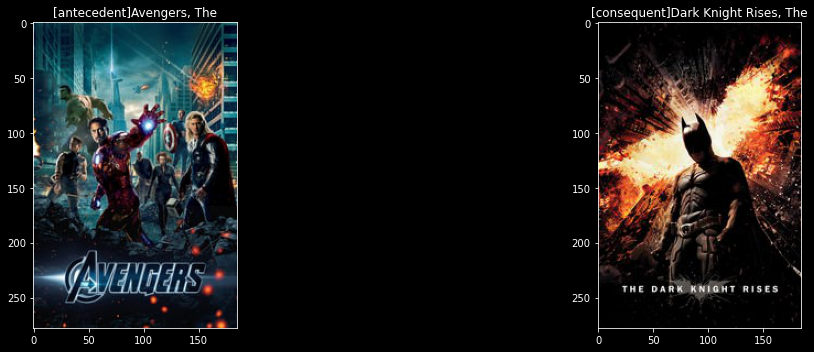

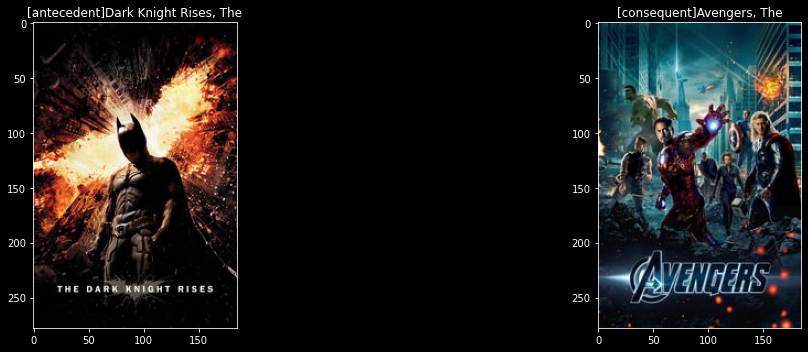

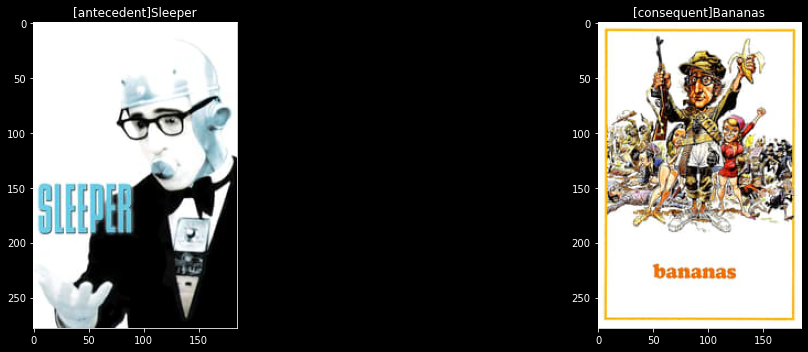

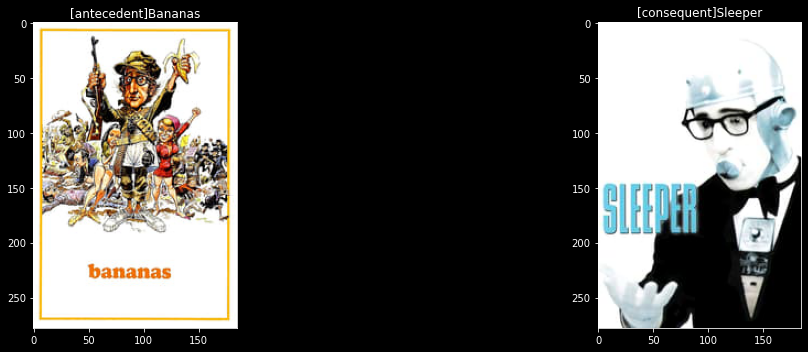

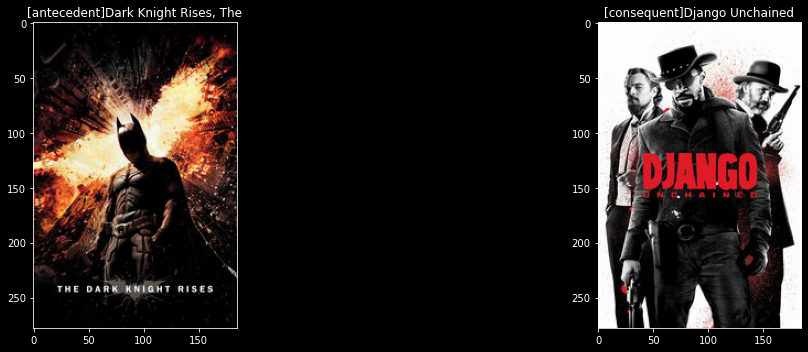

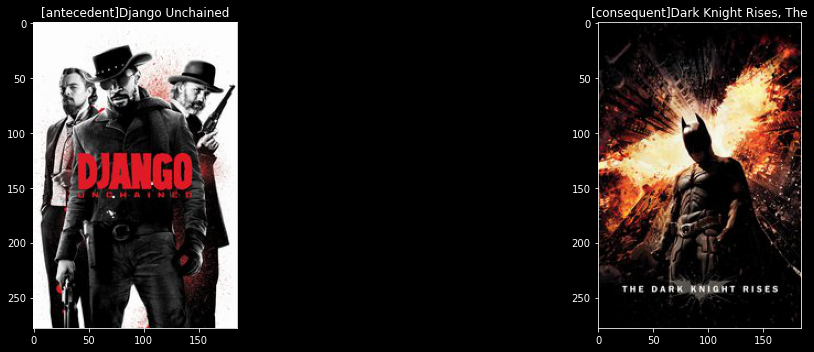

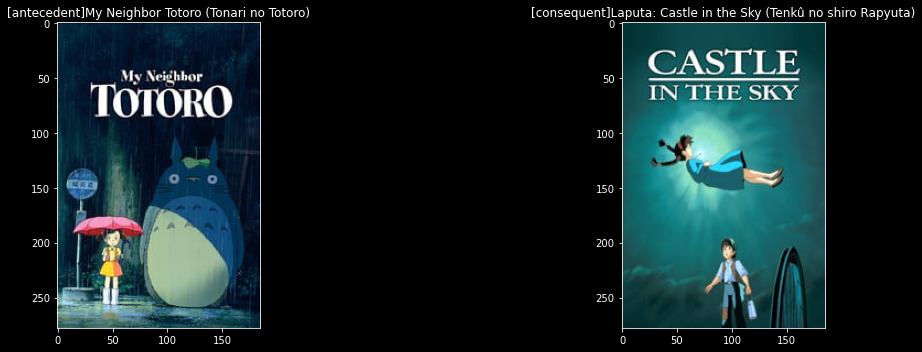

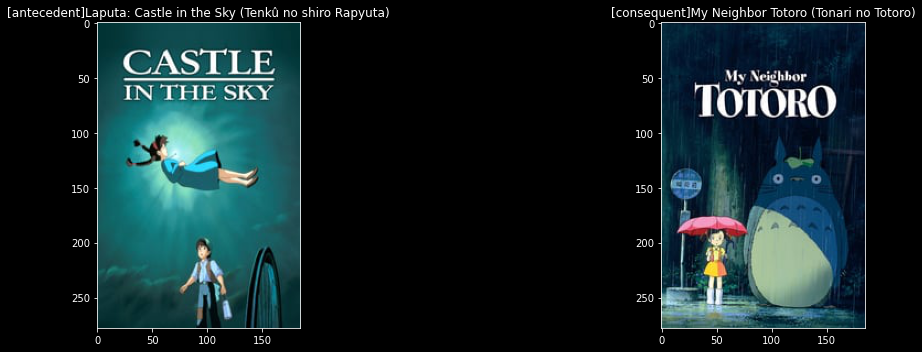

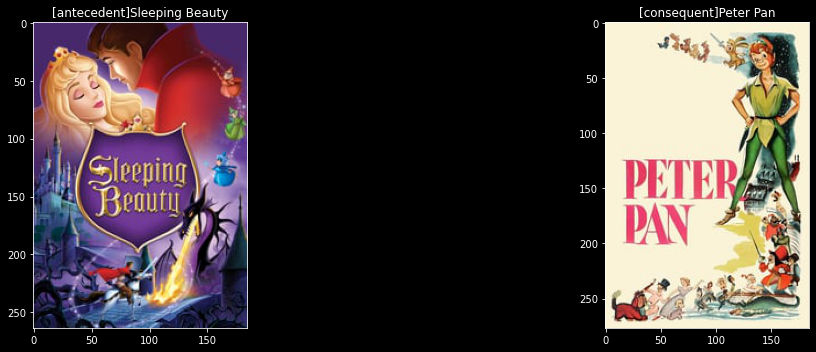

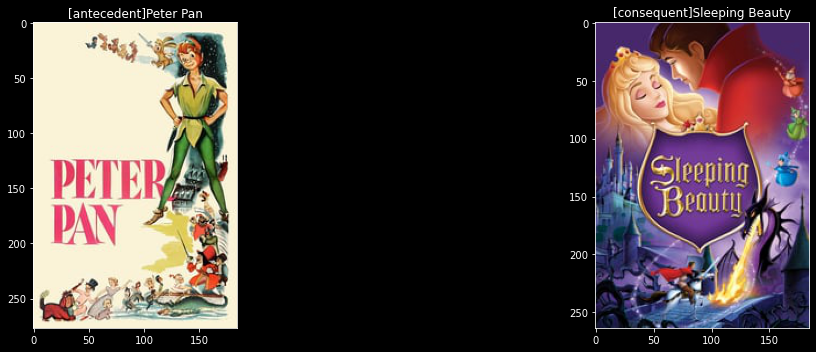

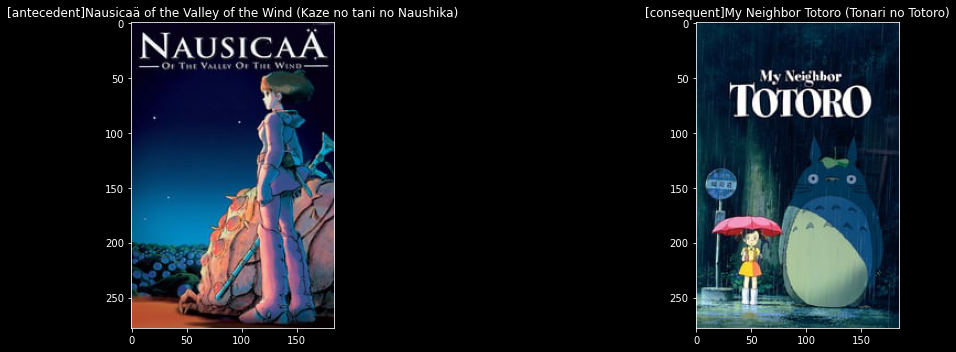

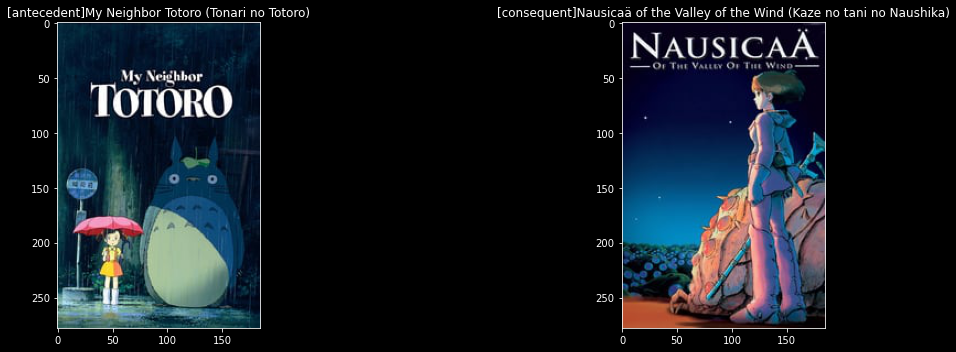

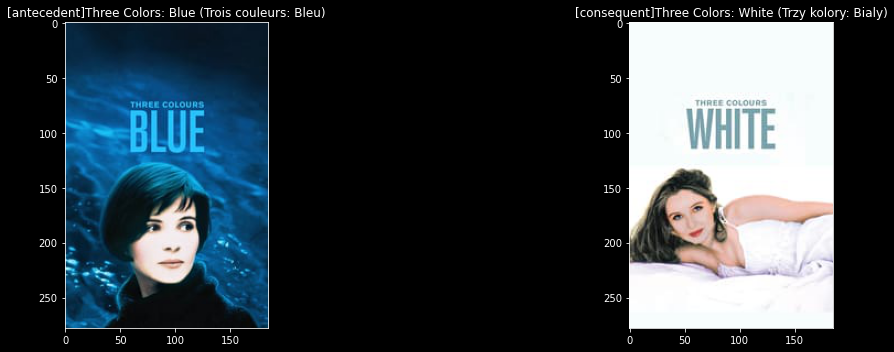

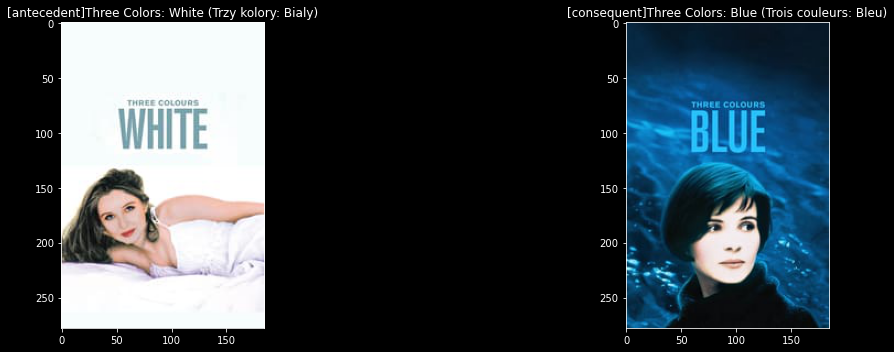

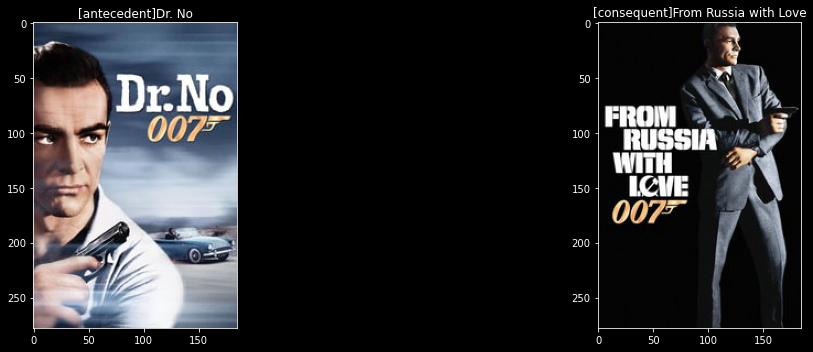

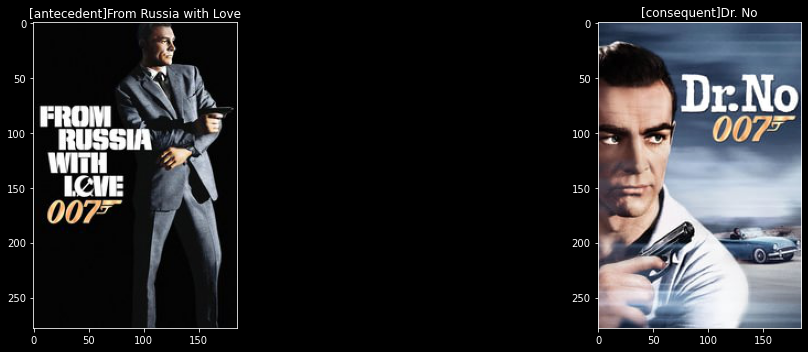

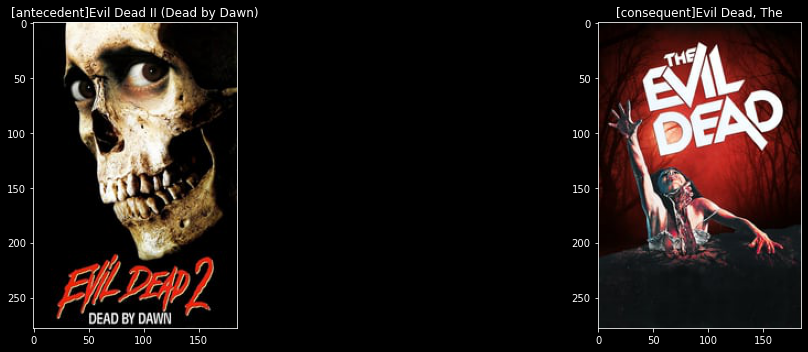

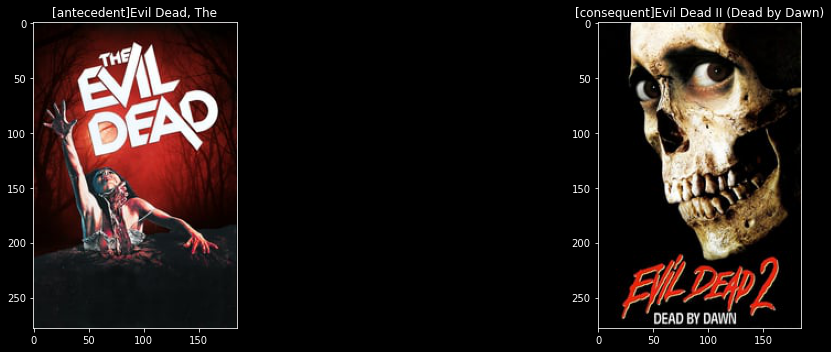

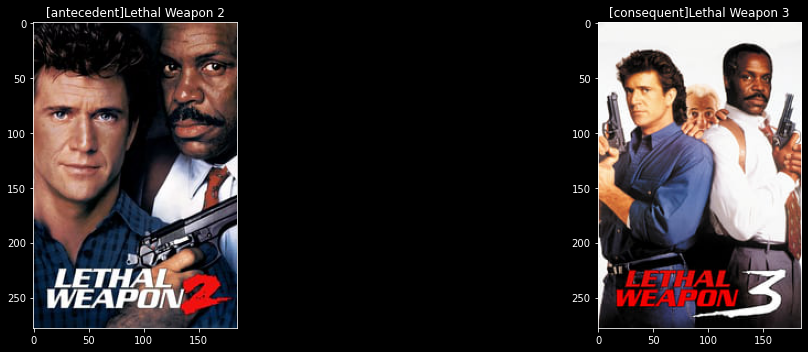

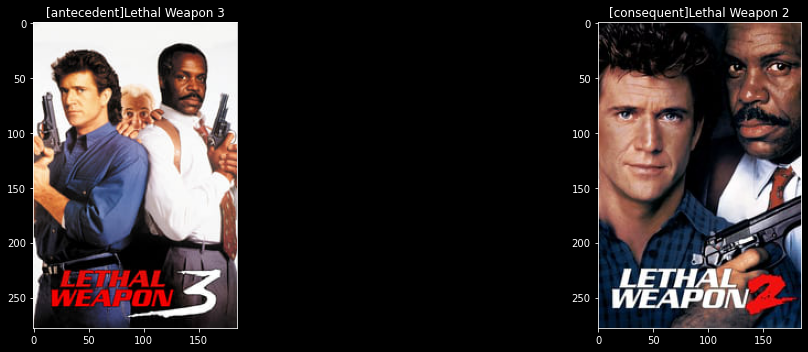

In [51]:
plt.style.use("dark_background")

for _, row in asso_rules[20:40].iterrows():
    display_poster(row["antecedents"], row["consequents"])